# zero to GPT

follow up this video: https://www.youtube.com/watch?v=l-CjXFmcVzY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch
from torch.nn import functional as F

Without learning 

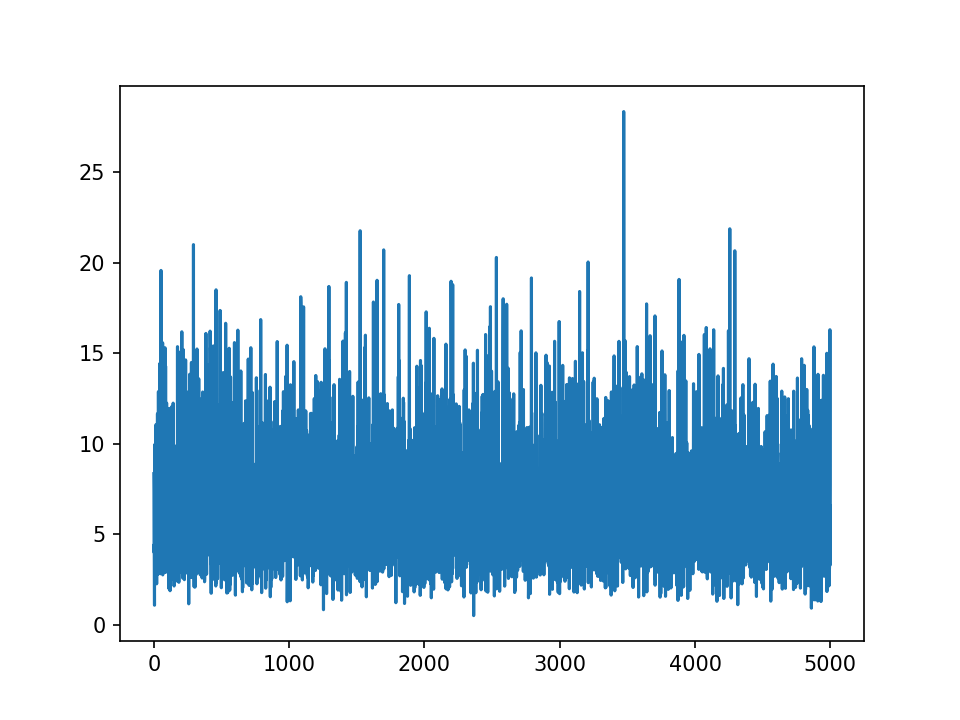

In [1]:
xs = np.asarray([
    [0,1,0,1,0],
    [0,0,1,1,0],
    [1,1,0,1,0],
    [1,1,0,0,1],
    [0,0,0,1,0],
])


ys = np.asarray([
    [0],
    [1],
    [1],
    [1],
    [0],
])


ins = 5
outs = 1

def weights(ins, outs):
    ws = np.random.randn(ins, outs)
    return ws

ws = weights(ins, outs)
# print(ws)


ers = []
for i in range(5000):
    yh = xs @ ws
    e = yh - ys
    e = np.sum(np.abs(e))
    if(e < 0.05):
        print("Found solution")
        print(ws)
    else:
        ws = weights(ins, outs)

    ers.append(e)

plt.figure(1)
plt.plot(ers)

# With learning just linear regression

Found solution
[[ 1.02620187e+00]
 [-5.34518553e-04]
 [ 1.01019399e+00]
 [-8.76823311e-03]
 [-2.28657113e-02]]


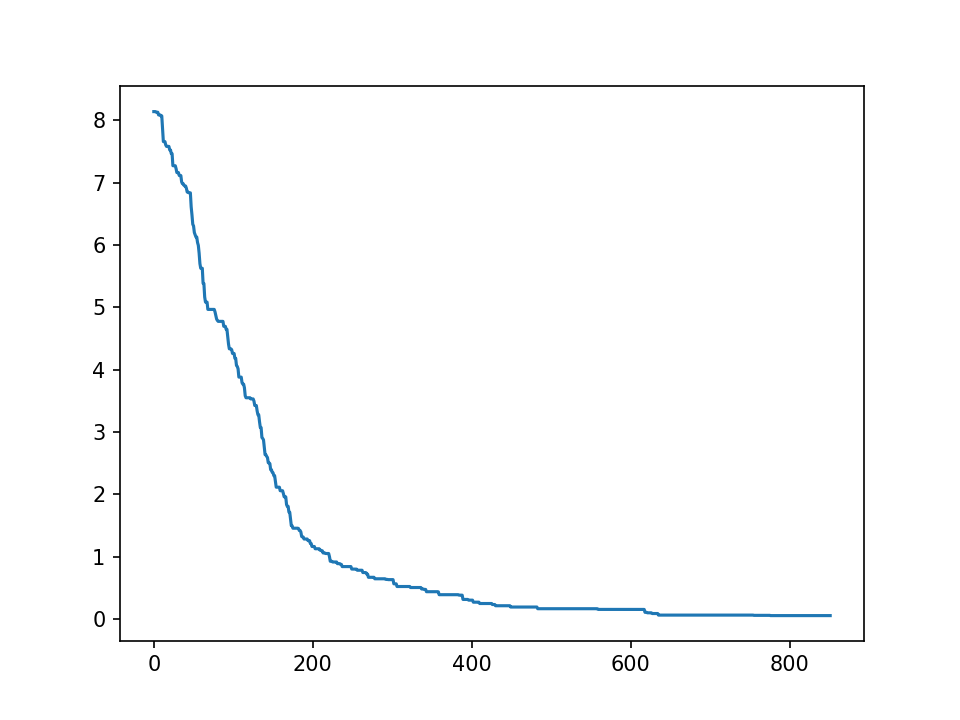

'°°°\n# With learning just linear with extra data in input\n°°°'

In [2]:
xs = np.asarray([
    [0,1,0,1,0],
    [0,0,1,1,0],
    [1,1,0,1,0],
    [1,1,0,0,1],
    [0,0,0,1,0],
])


ys = np.asarray([
    [0],
    [1],
    [1],
    [1],
    [0],
])


ins = 5
outs = 1

def weights(ins, outs):
    ws = np.random.randn(ins, outs)
    return ws

ws = weights(ins, outs)
# print(ws)


ers = []
for i in range(5000):
    yh = xs @ ws
    e = yh - ys
    e = np.sum(np.abs(e))
    if(e < 0.05):
        print("Found solution")
        print(ws)
        break
    else:
        mutation = weights(ins, outs) * 0.03
        cw = ws + mutation

        yh = xs @ cw 
        ce = yh - ys
        ce = np.sum(np.abs(ce))

        if(ce < e):
            ws = cw

    ers.append(e)

plt.figure(1)
plt.plot(ers)

# With learning just linear with extra data in input

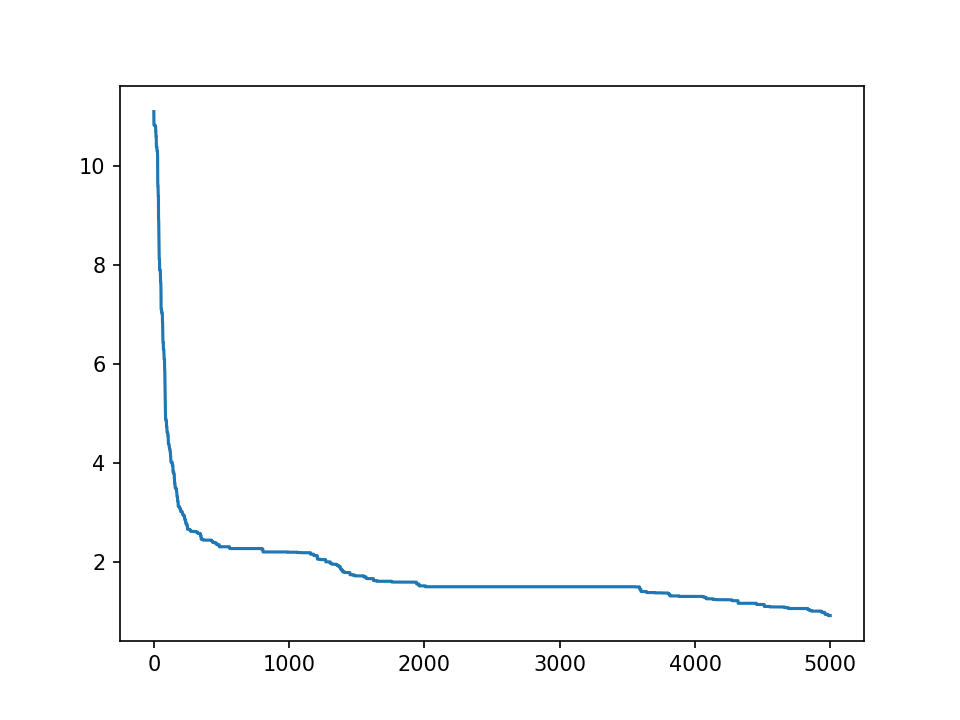

In [3]:
xs = np.asarray([
    [0,1,0,1,0],
    [0,0,1,1,0],
    [1,1,0,1,0],
    [1,1,0,0,1],
    [0,0,0,1,0],
])


ys = np.asarray([
    [0],
    [1],
    [1],
    [3],
    [3],
])

xs = np.hstack((xs, np.ones([xs.shape[0], 1])))

ins = 5
outs = 1

def weights(ins, outs):
    ws = np.random.randn(ins, outs)
    return ws

ws = weights(ins+1, outs)
# print(ws)


ers = []
for i in range(5000):
    yh = xs @ ws
    e = yh - ys
    e = np.sum(np.abs(e))
    if(e < 0.05):
        print("Found solution")
        print(ws)
        break
    else:
        mutation = weights(ins+1, outs) * 0.03
        cw = ws + mutation

        yh = xs @ cw 
        ce = yh - ys
        ce = np.sum(np.abs(ce))

        if(ce < e):
            ws = cw

    ers.append(e)

plt.figure(1)
plt.plot(ers)

# With learning just non-linear with sin actvion function and a new layer of nodes.

Found solution
[[-0.5994887 ]
 [ 0.57598503]
 [-0.33792811]
 [ 0.84353772]
 [-1.20793235]
 [ 0.53058488]
 [ 0.87972021]
 [-1.26416806]
 [-0.82840358]
 [ 0.33171955]
 [ 0.69995848]
 [-0.92685653]
 [ 0.82283227]
 [ 0.29761895]
 [ 0.4806895 ]]


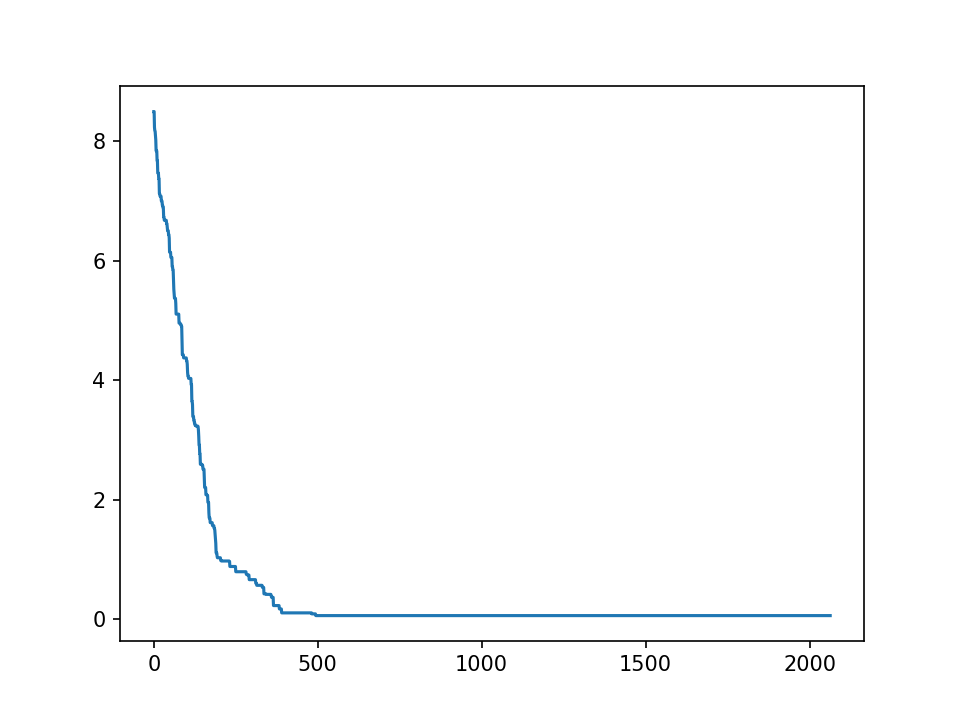

'°°°\n# Learning with gradient descent + non-linear + sin actvion function + a new layer of nodes.\n°°°'

In [4]:
xs = np.asarray([
    [0,1,0,1,0],
    [0,0,1,1,0],
    [1,1,0,1,0],
    [1,1,0,0,1],
    [0,0,0,1,0],
])


ys = np.asarray([
    [0],
    [1],
    [1],
    [3],
    [3],
])

xs = np.hstack((xs, np.ones([xs.shape[0], 1])))


ins = 5
outs = 1
nodes = 15

def weights(ins, outs):
    ws = np.random.randn(ins, outs)
    return ws

wi = weights(ins+1, nodes)
ws = weights(nodes, outs)

ers = []
epoch = 5000
for i in range(epoch):

    x = xs @ wi
    x = np.sin(x)

    yh = x @ ws
    
    e = yh - ys
    e = np.sum(np.abs(e))
    if(e < 0.05):
        print("Found solution")
        print(ws)
        break
    else:
        mutation = weights(nodes, outs) * 0.03
        cw = ws + mutation

        x = xs @ wi
        x = np.sin(x)

        yh = x @ cw 
        ce = yh - ys
        ce = np.sum(np.abs(ce))

        if(ce < e):
            ws = cw

    ers.append(e)

plt.figure(1)
plt.plot(ers)

# Learning with gradient descent + non-linear + sin actvion function + a new layer of nodes.

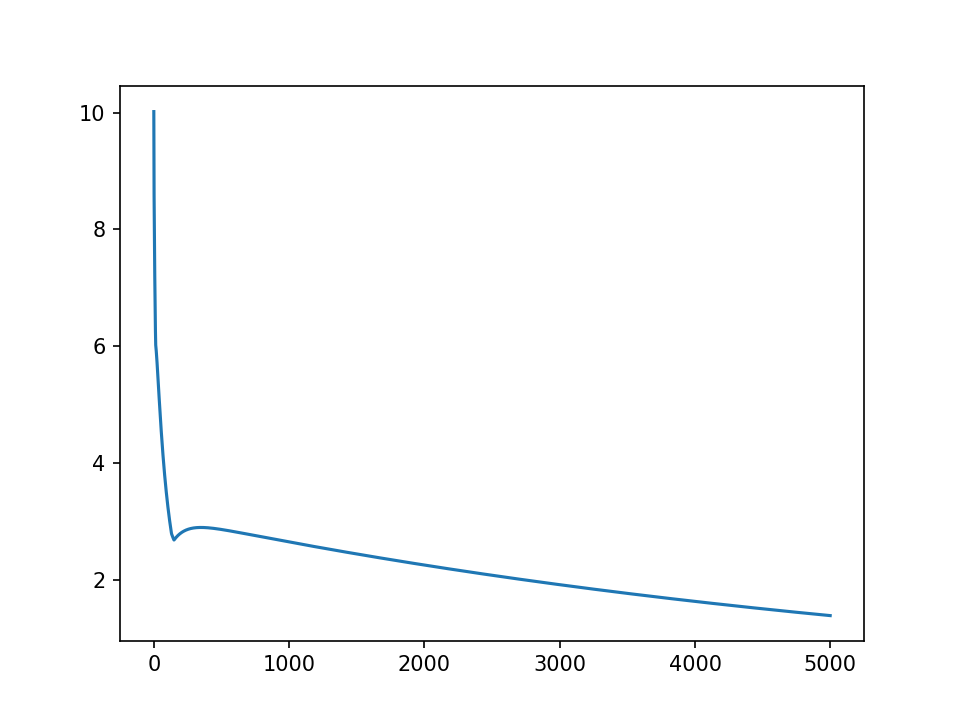

'°°°\n# Learning with gradient descent + non-linear + sin actvion function + a new layer of nodes.\n°°°'

In [5]:
xs = np.asarray([
    [0,1,0,1,0],
    [0,0,1,1,0],
    [1,1,0,1,0],
    [1,1,0,0,1],
    [0,0,0,1,0],
])


ys = np.asarray([
    [0],
    [1],
    [1],
    [3],
    [3],
])

xs = np.hstack((xs, np.ones([xs.shape[0], 1])))


ins = 5
outs = 1
nodes = 5

def weights(ins, outs):
    ws = np.random.randn(ins, outs)
    return ws


wi = weights(ins+1, nodes)
ws = weights(nodes, outs)
# print(ws)


ers = []
epoch = 5000
for i in range(epoch):

    x = xs @ wi
    x = np.sin(x)

    yh = x @ ws
    
    e = yh - ys * 1
    ws -= (x.T @ e) * 0.03
    e = np.sum(np.abs(e)) 


    ers.append(e)

plt.figure(1)
plt.plot(ers)

# Learning with gradient descent + non-linear + sin actvion function + multi-layer of nodes.

In [ ]:
# xs = np.asarray([
#     [0,1,0,1,0],
#     [0,0,1,1,0],
#     [1,1,0,1,0],
#     [1,1,0,0,1],
#     [0,0,0,1,0],
# ])


# ys = np.asarray([
#     [0],
#     [1],
#     [1],
#     [3],
#     [3],
# ])

xs = np.asarray([
    [1,0],
    [0,1],
    [1,1],
    [0,0],
])

ys = np.asarray([
    [1],
    [1],
    [0],
    [0],
])


xs = np.hstack((xs, np.ones([xs.shape[0], 1])))


ins = 2
outs = 1
nodes = 2
lr = 0.1



def weights(ins, outs):
    ws = np.random.randn(ins, outs)
    return ws


w0 = weights(ins+1, nodes)
w1 = weights(nodes, nodes)
w2 = weights(nodes, outs)


ers = []
epoch = 5000
for i in range(epoch):

    # Forward pass
    x0 = xs

    z0 = x0 @ w0; x1 = np.sin(z0)
    z1 = x1 @ w1; x2 = np.sin(z1)
    yh = x2 @ w2

    

    # Backward pass
    e = (yh - ys) * 1

    e2 = (e)        * 1
    e1 = (e2 @ w2.T) * np.cos(z1)
    e0 = (e1 @ w1.T) * np.cos(z0)

    # Update weights
    w2 -= (x2.T @ e2) * lr
    w1 -= (x1.T @ e1) * lr
    w0 -= (x0.T @ e0) * lr

    # calculate loss function
    e = np.sum(np.abs(e)) 


    ers.append(e)

plt.figure(1)
plt.plot(ers)

# Deep Learning with gradient descent + non-linear + sin actvion function + multi-layer of nodes.

In [ ]:
xs = np.asarray([
    [-10],
    [-8],
    [-6],
    [-4],
    [-2],
    [0],
    [2],
    [4],
    [6],
    [8],
    [10]
])

# ys = 3 * xs -2
# ys = 0.5 * xs + 7
ys = xs ** 2


xs = np.hstack((xs, np.ones([xs.shape[0], 1])))


ins = 1
outs = 1
nodes = 100
lr = 0.000001

def weights(ins, outs):
    ws = np.random.randn(ins, outs)
    return ws


w0 = weights(ins+1, nodes)
w1 = weights(nodes, nodes)
w2 = weights(nodes, outs)


ers = []
epoch = 10000
for i in range(epoch):

    # Forward pass
    x0 = xs

    z0 = x0 @ w0; x1 = np.sin(z0)
    z1 = x1 @ w1; x2 = np.sin(z1)
    yh = x2 @ w2

    

    # Backward pass
    e = (yh - ys) * 1

    e2 = (e)        * 1
    e1 = (e2 @ w2.T) * np.cos(z1)
    e0 = (e1 @ w1.T) * np.cos(z0)

    # Update weights
    w2 -= (x2.T @ e2) * lr
    w1 -= (x1.T @ e1) * lr
    w0 -= (x0.T @ e0) * lr

    # calculate loss function
    e = np.sum(np.abs(e)) 


    ers.append(e)

plt.figure(1)
plt.plot(ers)



plt.figure(2)
plt.plot(ys)
plt.plot(yh)

# Deep Learning using pytorch with gradient descent + non-linear + sin actvion function + multi-layer of nodes.

In [ ]:
xs = torch.asarray([
    [-10],
    [-8],
    [-6],
    [-4],
    [-2],
    [0],
    [2],
    [4],
    [6],
    [8],
    [10]
])

# ys = 3 * xs -2
# ys = 0.5 * xs + 7
ys = xs ** 2
xs = torch.hstack((xs, torch.ones([xs.shape[0], 1])))

xs = torch.tensor(xs).float()
ys = torch.tensor(ys).float()


ins = 1
outs = 1
nodes = 150
lr = 0.001

def weights(ins, outs):
    ws = torch.randn(ins, outs)
    ws = ws.requires_grad_(True)
    return ws


w0 = weights(ins+1, nodes)
w1 = weights(nodes, nodes)
w2 = weights(nodes, outs)

# optimizer= torch.optim.SGD([w0, w1, w2], lr)
optimizer= torch.optim.Adam([w0, w1, w2], lr)

epoch = 500
ers = []
for i in range(epoch):

    # Forward pass
    x0 = xs

    z0 = x0 @ w0; x1 = torch.sin(z0)
    z1 = x1 @ w1; x2 = torch.sin(z1)
    yh = x2 @ w2

    

    loss = F.mse_loss(yh, ys)
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    # calculate loss function
    e = loss.item()
    if i % 500:
        print(e)
    ers.append(e)

plt.figure(1)
plt.plot(ers)

plt.figure(2)
plt.plot(ys)
plt.plot(yh.detach.numpy())

# Deep Learning using pytorch with classes with gradient descent + non-linear + sin actvion function + multi-layer of nodes.

1647.85888671875
1178.76416015625
812.4763793945312
534.6364135742188
331.39862060546875
189.65223693847656
97.04414367675781
42.03770446777344
14.184585571289062
4.456359386444092
5.42692232131958
11.296428680419922
17.852890014648438
22.416872024536133
23.728965759277344
21.749977111816406
17.373958587646484
12.057311058044434
7.375869274139404
4.543444633483887
4.000617027282715
5.262979984283447
7.195797920227051
8.624139785766602
8.884178161621094
7.9957685470581055
6.461491107940674
4.908941268920898
3.7892701625823975
3.243145227432251
3.1396398544311523
3.2112679481506348
3.201347589492798
2.9634435176849365
2.4948596954345703
1.9120292663574219
1.3868011236190796
1.0686389207839966
1.0205553770065308
1.1934672594070435
1.4500207901000977
1.6282707452774048
1.6133217811584473
1.3835092782974243
1.0110751390457153
0.6205611824989319
0.3315826654434204
0.21082600951194763
0.2533908188343048
0.3955657184123993
0.5484455227851868
0.6361264586448669
0.6221860647201538
0.516923964023

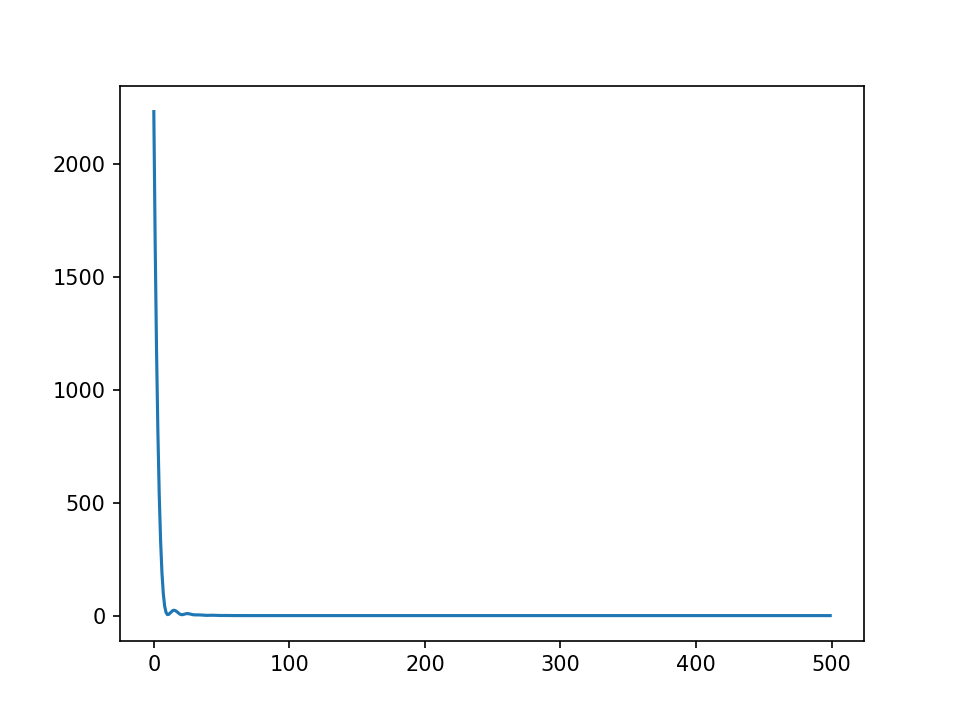

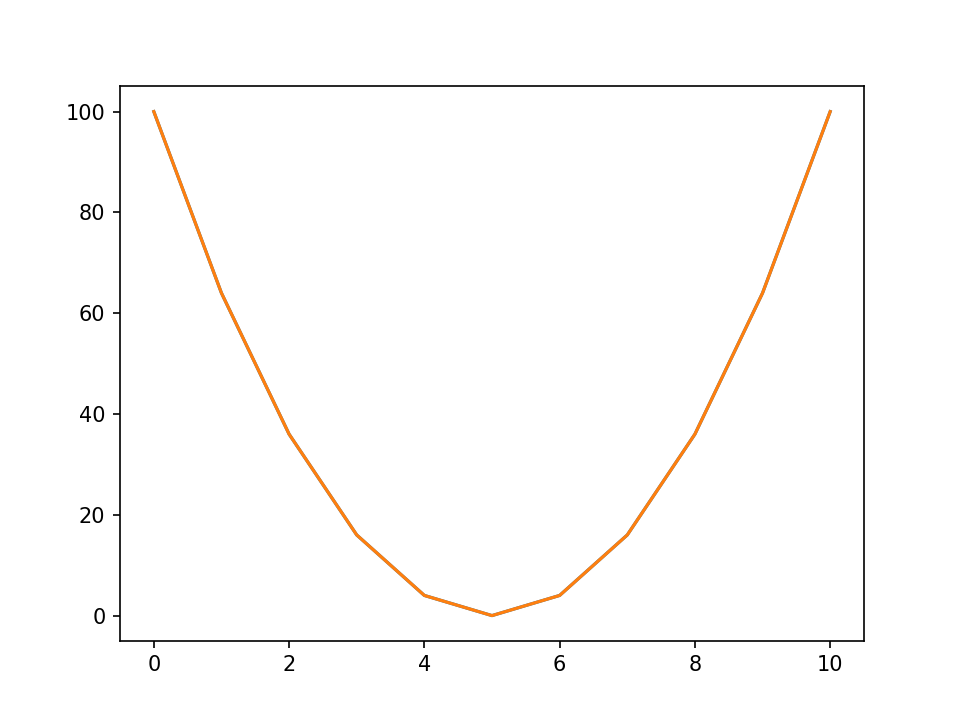

In [6]:
xs = torch.asarray([
    [-10],
    [-8],
    [-6],
    [-4],
    [-2],
    [0],
    [2],
    [4],
    [6],
    [8],
    [10]
])

# ys = 3 * xs -2
# ys = 0.5 * xs + 7
ys = xs ** 2
xs = torch.hstack((xs, torch.ones([xs.shape[0], 1])))

xs = torch.tensor(xs).float()
ys = torch.tensor(ys).float()


ins = 1
outs = 1
nodes = 200
lr = 0.001

params = []
def weights(ins, outs):
    ws = torch.randn(ins, outs)
    ws = ws.requires_grad_(True)
    params.append(ws)
    return ws


class Model():
    def __init__(self):
        self.w0 = weights(ins+1, nodes)
        self.w1 = weights(nodes, nodes)
        self.w2 = weights(nodes, outs)

    def forward(self, x):
        x = torch.sin(x @ self.w0)
        x = torch.sin(x @ self.w1)
        yh = x @ self.w2
        return yh



model = Model()
# optimizer= torch.optim.SGD([w0, w1, w2], lr)
# optimizer= torch.optim.Adam([w0, w1, w2], lr)
optimizer= torch.optim.Adam(params, lr)

epoch = 500
ers = []
for i in range(epoch):
    yh = model.forward(xs)

    loss = F.mse_loss(yh, ys)
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    # calculate loss function
    e = loss.item()
    if i % 500:
        print(e)
    ers.append(e)

plt.figure(1)
plt.plot(ers)

plt.figure(2)
plt.plot(ys)
plt.plot(yh.detach().numpy())


test_val = -5
test_val =  torch.tensor([test_val, 1]).float()
result = model.forward(test_val)
print(result)

# Deep Learning + AUTO Regression + dropout regularion using pytorch with classes with gradient descent + non-linear + sin actvion function + multi-layer of nodes.

In [ ]:
with open("file.txt", 'r', encoding='utf-8') as f:
    text = f.read()

text = text.lower()
chars = sorted(list(set(text)))
stoi = {c:i for i, c in enumerate(chars)}
data =  [stoi[c] for c in text]
vocab_size = len(chars)

ns = 5
outs = 1
nodes = 100
lr = 0.003

data = torch.tensor(data).float()
xs = torch.stack([data[i:i+ins] for i in range(len(data)-ins)])
ys = torch.stack([data[i+ins:i+ins+1] for i in range(len(data)-ins)])

params = []
def weights(ins, outs):
    ws = torch.randn(ins, outs) *  0.1
    ws = ws.requires_grad_(True)
    params.append(ws)
    return ws


class Model():
    def __init__(self):
        self.w0 = weights(ins, nodes)
        self.w1 = weights(nodes, nodes)
        self.w2 = weights(nodes, outs)

    def forward(self, x):
        # x = torch.sin(x @ self.w0)
        # x = torch.sin(x @ self.w1)

        x = torch.relu(x @ self.w0)
        x = torch.relu(x @ self.w1)


        yh = x @ self.w2
        return yh



model = Model()
# optimizer= torch.optim.SGD([w0, w1, w2], lr)
# optimizer= torch.optim.Adam([w0, w1, w2], lr)
optimizer= torch.optim.Adam(params, lr)

epoch = 500
ers = []
for i in range(epoch):
    yh = model.forward(xs)

    loss = F.mse_loss(yh, ys)
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    # calculate loss function
    e = loss.item()
    if i % 500:
        print(e)
    ers.append(e)

plt.figure(1)
plt.plot(ers)

plt.figure(2)
plt.plot(ys)
plt.plot(yh.detach().numpy())

# Deep Learning + AUTO Regression + batches + dropout regularion using pytorch with classes with gradient descent + non-linear + sin actvion function + multi-layer of nodes.

19.942537307739258
17.551660537719727
14.4520902633667
13.674490928649902
12.289470672607422
10.981524467468262
10.582355499267578
9.788592338562012
10.823694229125977
9.2864408493042
7.132793426513672
7.358644962310791
8.532476425170898
8.174214363098145
6.619665145874023
6.882847309112549
6.455442428588867
6.1937174797058105
5.9440436363220215
6.469354629516602
4.944983959197998
5.6630120277404785
4.7636637687683105
4.853046894073486
4.5793657302856445
4.200536727905273
4.3715620040893555
4.415772914886475
3.9086029529571533
4.255966663360596
3.3885815143585205
3.440993309020996
3.325826644897461
2.9023048877716064
2.8870115280151367
3.2351109981536865
2.8586575984954834
3.310274362564087
3.7178173065185547
2.9040110111236572
2.453343629837036
2.3711020946502686
2.4937386512756348
2.560493230819702
2.608808994293213
2.4691460132598877
2.320483446121216
2.0953593254089355
1.9408860206604004
1.7862025499343872
2.1570589542388916
1.8128445148468018
1.7975305318832397
1.8059595823287964


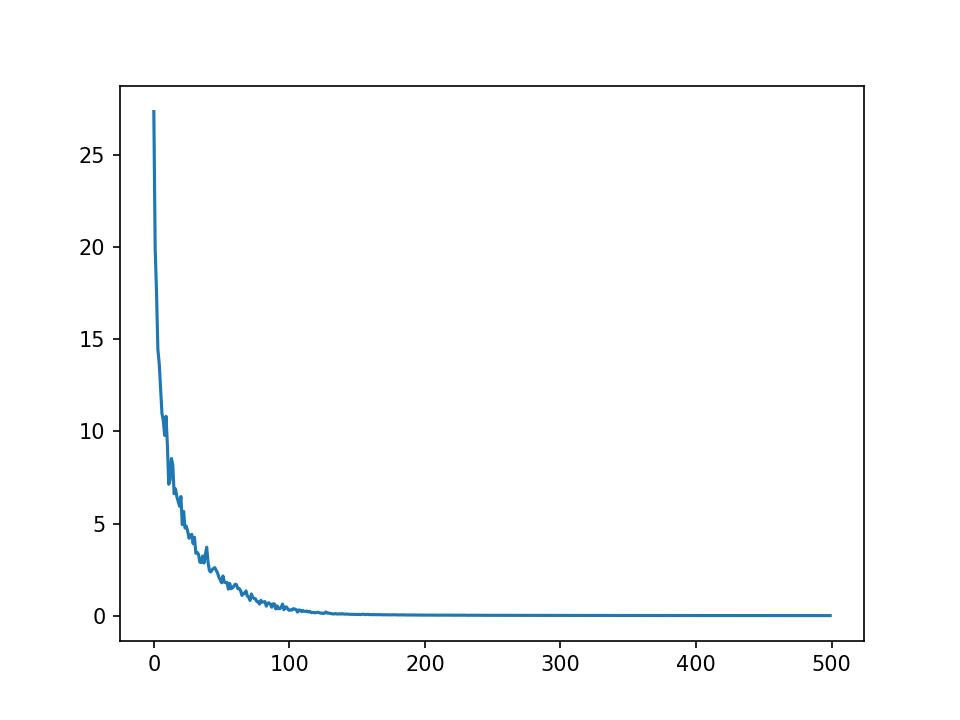

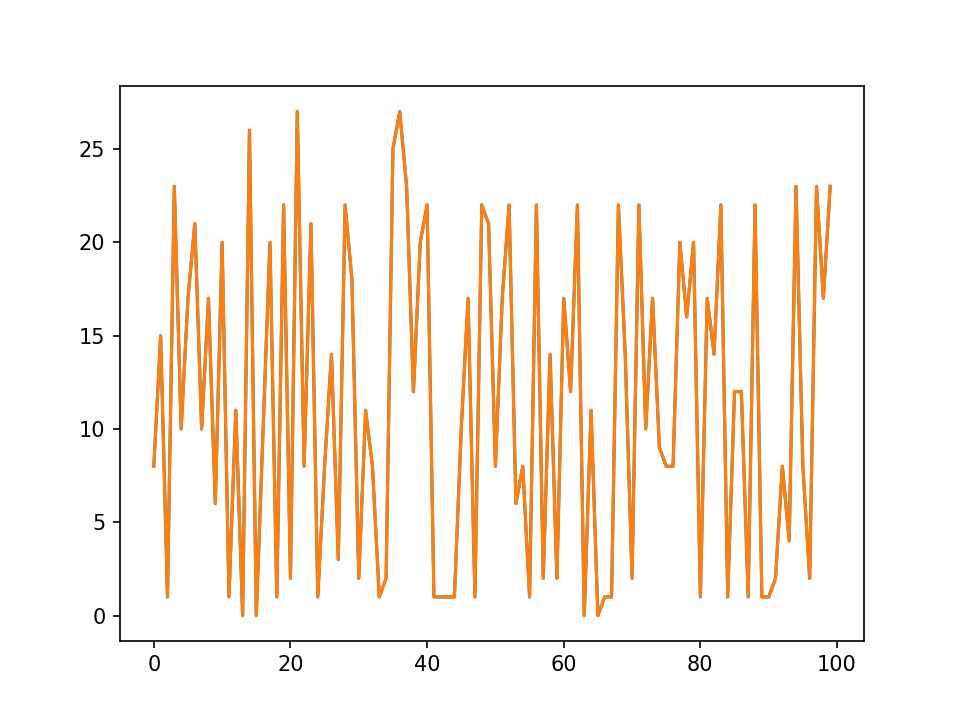

In [7]:
with open("file.txt", 'r', encoding='utf-8') as f:
    text = f.read()

text = text.lower()
chars = sorted(list(set(text)))
stoi = {c:i for i, c in enumerate(chars)}
itos = {i:c for i, c in enumerate(chars)}
data =  [stoi[c] for c in text]
vocab_size = len(chars)

ins = 64
outs = vocab_size
nodes = 200
lr = 0.001

data = torch.tensor(data).float()
params = []
def weights(ins, outs):
    ws = torch.randn(ins, outs) *  0.1
    ws = ws.requires_grad_(True)
    params.append(ws)
    return ws


class Model():
    def __init__(self):
        self.w0 = weights(ins, nodes)
        self.w1 = weights(nodes, nodes)
        self.w2 = weights(nodes, outs)

    def forward(self, x):
        # x = torch.sin(x @ self.w0)
        # x = torch.sin(x @ self.w1)

        x = torch.relu(x @ self.w0)
        x = torch.relu(x @ self.w1)


        yh = x @ self.w2
        return yh



model = Model()
# optimizer= torch.optim.SGD([w0, w1, w2], lr)
# optimizer= torch.optim.Adam([w0, w1, w2], lr)
optimizer= torch.optim.Adam(params, lr)

epoch = 500
ers = []
for i in range(epoch):

    b = torch.randint(len(data)-ins, (100,))
    xs = torch.stack([data[i:i+ins] for i in b])
    ys = torch.stack([data[i+ins:i+ins+1] for i in b])


    yh = model.forward(xs)
    loss = F.cross_entropy(yh.view(-1, vocab_size), ys.long().view(-1))
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    # calculate loss function
    e = loss.item()
    if i % 500:
        print(e)
    ers.append(e)

plt.figure(1)
plt.plot(ers)

plt.figure(2)
plt.plot(ys)
plt.plot(torch.argmax(yh.detach(), dim=-1))


test_val = xs[0]

# yh =  model.forward(test_val)
# prob =  F.softmax(yh, dim=0)
# prob2 =  torch.softmax(yh * 0.7, dim=0).item()
# pred =  torch.argmax(yh, dim=0).item()
# print(itos[pred])

gen_text = ""
for i in range(3000):

    yh =  model.forward(test_val)
    prob =  F.softmax(yh, dim=0)
    # pred = torch.argmax(yh).item()
    pred = torch.multinomial(prob, num_samples=1).item()

    test_val = torch.roll(test_val, -1)
    test_val[-1] = pred

    gen_text += itos[pred]


print(gen_text)

# Deep Learning + Conveoluational Neural Network + AUTO Regression + batches + dropout regularion using pytorch with classes with gradient descent + non-linear + sin actvion function + multi-layer of nodes.

In [ ]:
with open("file.txt", 'r', encoding='utf-8') as f:
    text = f.read()

text = text.lower()
chars = sorted(list(set(text)))
stoi = {c:i for i, c in enumerate(chars)}
itos = {i:c for i, c in enumerate(chars)}
data =  [stoi[c] for c in text]
vocab_size = len(chars)

ins = 64
outs = vocab_size
nodes = 200
lr = 0.001
n_emb = 64
embed = torch.randn(vocab_size, n_emb)
pos = torch.randn(ins, n_emb)

data = torch.tensor(data).long()
params = []
def weights(ins, outs):
    ws = torch.randn(ins, outs) *  0.1
    ws = ws.requires_grad_(True)
    params.append(ws)
    return ws


class Head():
    def __init__(self):
        self.wv = weights(n_emb, n_emb//4) # Diveded by number of heads for avoid expandding
    
    def forward(self, x):
        x = x @ self.wv
        # x = torch.sum(x, dim=-2)
        ones = torch.ones(ins, ins)
        tril = torch.tril(ones)
        tril = tril.masked_fill(tril==0, -1e10)
        rew = F.softmax(tril, dim=-1)
        x = rew @ x
        return x


class Model():
    def __init__(self):
        self.heads = [Head(), Head(), Head(), Head()]
        self.w0 = weights(n_emb, nodes)
        self.w1 = weights(nodes, nodes)
        self.w2 = weights(nodes, outs)

    def forward(self, x):
        x = embed[x] * pos 
        x = torch.cat([head.forward(x) for head in self.heads], dim=-1)

        x = torch.relu(x @ self.w0)
        x = torch.relu(x @ self.w1)


        yh = x @ self.w2
        return yh



model = Model()
optimizer= torch.optim.Adam(params, lr)

epoch = 500
ers = []
for i in range(epoch):

    b = torch.randint(len(data)-ins, (100,))
    xs = torch.stack([data[i:i+ins] for i in b])
    ys = torch.stack([data[i+1:i+ins+1] for i in b])


    yh = model.forward(xs)
    loss = F.cross_entropy(yh.view(-1, vocab_size), ys.long().view(-1))
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    # calculate loss function
    e = loss.item()
    if i % 500:
        print(e)
    ers.append(e)

plt.figure(1)
plt.plot(ers)

plt.figure(2)
plt.plot(ys)
plt.plot(torch.argmax(yh.detach(), dim=-1))


test_val = xs[0]

# yh =  model.forward(test_val)
# prob =  F.softmax(yh, dim=0)
# prob2 =  torch.softmax(yh * 0.7, dim=0).item()
# pred =  torch.argmax(yh, dim=0).item()
# print(itos[pred])

gen_text = ""
for i in range(3000):

    yh =  model.forward(test_val)
    prob =  F.softmax(yh[-1, :], dim=0)
    # pred = torch.argmax(yh).item()
    pred = torch.multinomial(prob, num_samples=1).item()

    test_val = torch.roll(test_val, -1)
    test_val[-1] = pred

    gen_text += itos[pred]


print(gen_text)

# Deep Learning + Attention + Conveoluational Neural Network + AUTO Regression + batches + dropout regularion using pytorch with classes with gradient descent + non-linear + sin actvion function + multi-layer of nodes.

3.319222927093506
3.2568936347961426
3.2164735794067383
3.171438694000244
3.1372814178466797
3.101909875869751
3.066202163696289
3.034595251083374
3.01633882522583
3.0040788650512695
2.982975721359253
2.9596951007843018
2.944683790206909
2.928722620010376
2.9145336151123047
2.9010634422302246
2.87380313873291
2.8499820232391357
2.8310940265655518
2.8183257579803467
2.7943408489227295
2.7623531818389893
2.7481417655944824
2.7273995876312256
2.6943438053131104
2.6952261924743652
2.6466143131256104
2.6361148357391357
2.6143722534179688
2.5983786582946777
2.558844804763794
2.531451940536499
2.4965763092041016
2.495436191558838
2.478978395462036
2.450313091278076
2.4270474910736084
2.405942916870117
2.3905811309814453
2.3634984493255615
2.351449489593506
2.326542615890503
2.308419942855835
2.294578790664673
2.279385805130005
2.2724952697753906
2.261119842529297
2.2222957611083984
2.1815073490142822
2.1777145862579346
2.1570699214935303
2.1775619983673096
2.1454946994781494
2.116239786148071

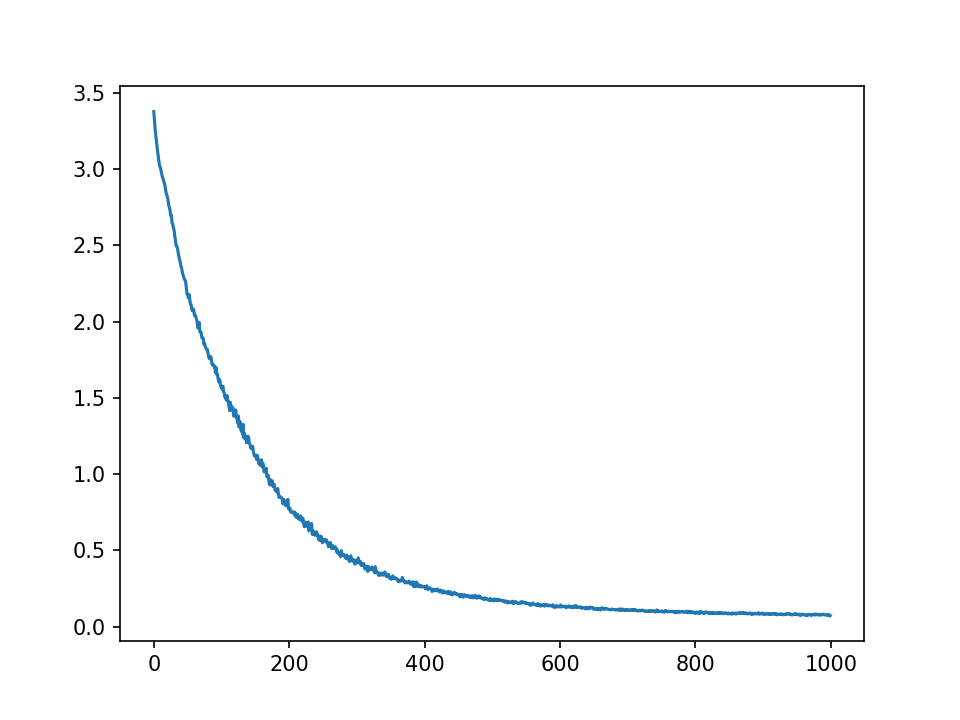

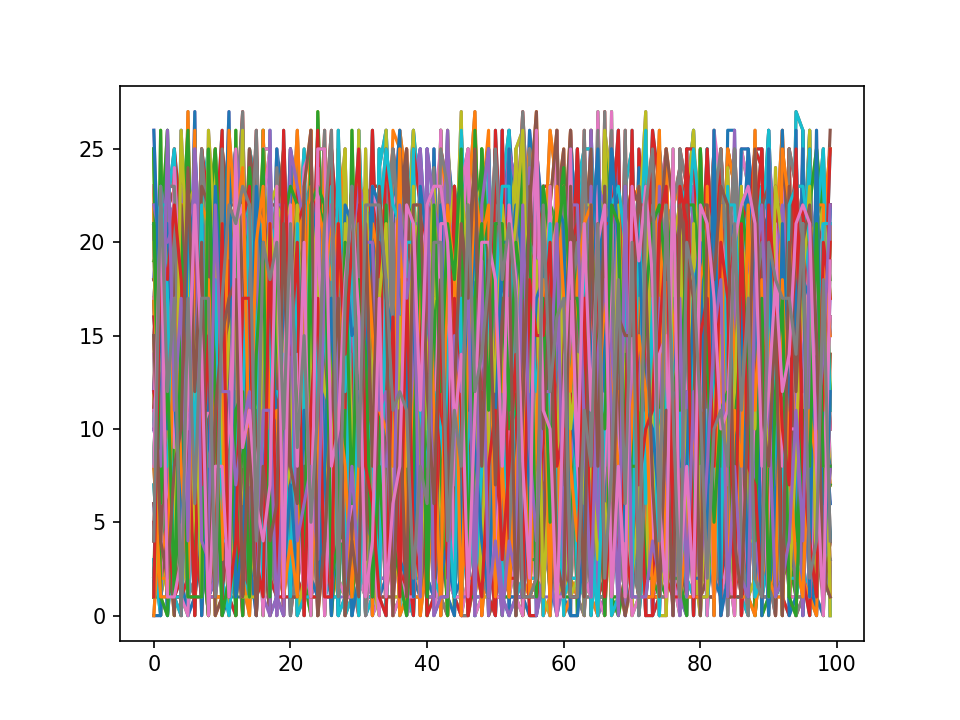

In [8]:
with open("file.txt", 'r', encoding='utf-8') as f:
    text = f.read()

text = text.lower()
chars = sorted(list(set(text)))
stoi = {c:i for i, c in enumerate(chars)}
itos = {i:c for i, c in enumerate(chars)}
data =  [stoi[c] for c in text]
vocab_size = len(chars)

ins = 64
outs = vocab_size
nodes = 200
lr = 0.001
n_emb = 64
embed = torch.randn(vocab_size, n_emb)
pos = torch.randn(ins, n_emb)

data = torch.tensor(data).long()
params = []
def weights(ins, outs):
    ws = torch.randn(ins, outs) *  0.1
    ws = ws.requires_grad_(True)
    params.append(ws)
    return ws


class Head():
    def __init__(self):
        self.wv = weights(n_emb, n_emb//4) # Diveded by number of heads for avoid expandding
        self.wq = weights(n_emb, n_emb//4) # Diveded by number of heads for avoid expandding
        self.wk = weights(n_emb, n_emb//4) # Diveded by number of heads for avoid expandding
    
    def forward(self, x):
        v = x @ self.wv
        q = x @ self.wq
        k = x @ self.wk

        attn = (q @ k.transpose(-2, -1)) / k.shape[0]**0.5
        tril = torch.tril(attn)
        tril = tril.masked_fill(tril==0, -1e10)
        rew = F.softmax(tril, dim=-1)
        x = rew @ v

        return x


class Model():
    def __init__(self):
        self.heads = [Head(), Head(), Head(), Head()]
        self.w0 = weights(n_emb, nodes)
        self.w1 = weights(nodes, nodes)
        self.w2 = weights(nodes, outs)

    def forward(self, x):
        x = embed[x] + pos 
        x = torch.cat([head.forward(x) for head in self.heads], dim=-1)

        x = torch.relu(x @ self.w0)
        x = torch.relu(x @ self.w1)


        yh = x @ self.w2
        return yh



model = Model()
optimizer= torch.optim.Adam(params, lr)

epoch = 1000
ers = []
for i in range(epoch):

    b = torch.randint(len(data)-ins, (100,))
    xs = torch.stack([data[i:i+ins] for i in b])
    ys = torch.stack([data[i+1:i+ins+1] for i in b])


    yh = model.forward(xs)
    loss = F.cross_entropy(yh.view(-1, vocab_size), ys.long().view(-1))
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    # calculate loss function
    e = loss.item()
    if i % 500:
        print(e)
    ers.append(e)

plt.figure(1)
plt.plot(ers)

plt.figure(2)
plt.plot(ys)
plt.plot(torch.argmax(yh.detach(), dim=-1))


test_val = xs[0]

# yh =  model.forward(test_val)
# prob =  F.softmax(yh, dim=0)
# prob2 =  torch.softmax(yh * 0.7, dim=0).item()
# pred =  torch.argmax(yh, dim=0).item()
# print(itos[pred])

gen_text = ""
for i in range(3000):

    yh =  model.forward(test_val)
    prob =  F.softmax(yh[-1, :], dim=0)
    # pred = torch.argmax(yh).item()
    pred = torch.multinomial(prob, num_samples=1).item()

    test_val = torch.roll(test_val, -1)
    test_val[-1] = pred

    gen_text += itos[pred]


print(gen_text)

# Deep Learning + Blocks of Attention + Conveoluational Neural Network + AUTO Regression + batches + dropout regularion using pytorch with classes with gradient descent + non-linear + sin actvion function + multi-layer of nodes.

In [ ]:
with open("file.txt", 'r', encoding='utf-8') as f:
    text = f.read()

text = text.lower()
chars = sorted(list(set(text)))
stoi = {c:i for i, c in enumerate(chars)}
itos = {i:c for i, c in enumerate(chars)}
data =  [stoi[c] for c in text]
vocab_size = len(chars)

ins = 64
outs = vocab_size
nodes = 200
lr = 0.001
n_emb = 64
embed = torch.randn(vocab_size, n_emb)
pos = torch.randn(ins, n_emb)

data = torch.tensor(data).long()
params = []
def weights(ins, outs):
    ws = torch.randn(ins, outs) *  0.1
    ws = ws.requires_grad_(True)
    params.append(ws)
    return ws


class Head():
    def __init__(self):
        self.wv = weights(n_emb, n_emb//4) # Diveded by number of heads for avoid expandding
        self.wq = weights(n_emb, n_emb//4) # Diveded by number of heads for avoid expandding
        self.wk = weights(n_emb, n_emb//4) # Diveded by number of heads for avoid expandding
    
    def forward(self, x):
        v = x @ self.wv
        q = x @ self.wq
        k = x @ self.wk

        attn = (q @ k.transpose(-2, -1)) / k.shape[0]**0.5
        tril = torch.tril(attn)
        tril = tril.masked_fill(tril==0, -1e10)
        rew = F.softmax(tril, dim=-1)
        x = rew @ v
        return x


class Block():

    def __init__(self):
        self.heads = [Head(), Head(), Head(), Head()]
        self.w0 = weights(n_emb, nodes)
        self.w1 = weights(nodes, n_emb)
 

    def forward(self, x):
        x = torch.cat([head.forward(x) for head in self.heads], dim=-1)
        x = torch.relu(x @ self.w0)
        x = torch.relu(x @ self.w1)
        return x




class Model():
    def __init__(self):
        self.blocks = [Block(), Block(), Block()]
        self.w2 = weights(n_emb, outs)

    def forward(self, x):
        x = embed[x] + pos 
        x = x + self.blocks[0].forward(x)
        x = x + self.blocks[1].forward(x)
        x = x + self.blocks[2].forward(x)

        yh = x @ self.w2
        return yh



model = Model()
optimizer= torch.optim.Adam(params, lr)

epoch = 1000
ers = []
for i in range(epoch):

    b = torch.randint(len(data)-ins, (100,))
    xs = torch.stack([data[i:i+ins] for i in b])
    ys = torch.stack([data[i+1:i+ins+1] for i in b])


    yh = model.forward(xs)
    loss = F.cross_entropy(yh.view(-1, vocab_size), ys.long().view(-1))
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    # calculate loss function
    e = loss.item()
    if i % 500 == 0:
        print(e)
    ers.append(e)

plt.figure(1)
plt.plot(ers)

plt.figure(2)
plt.plot(ys)
plt.plot(torch.argmax(yh.detach(), dim=-1))


test_val = xs[0]

# yh =  model.forward(test_val)
# prob =  F.softmax(yh, dim=0)
# prob2 =  torch.softmax(yh * 0.7, dim=0).item()
# pred =  torch.argmax(yh, dim=0).item()
# print(itos[pred])

gen_text = ""
for i in range(3000):

    yh =  model.forward(test_val)
    prob =  F.softmax(yh[-1, :], dim=0)
    # pred = torch.argmax(yh).item()
    pred = torch.multinomial(prob, num_samples=1).item()

    test_val = torch.roll(test_val, -1)
    test_val[-1] = pred

    gen_text += itos[pred]


print(gen_text)

# Deep Learning + Re-weight + Blocks of Attention + Conveoluational Neural Network + AUTO Regression + batches + dropout regularion using pytorch with classes with gradient descent + non-linear + sin actvion function + multi-layer of nodes.

5.085551738739014
4.420536041259766
4.197286605834961
4.073940753936768
3.9111409187316895
3.8047866821289062
3.733095407485962
3.65246319770813
3.562716484069824
3.48362135887146
3.4159600734710693
3.353144884109497
3.303539752960205
3.2155816555023193
3.188333749771118
3.1366260051727295
3.0650107860565186
3.0411758422851562
2.9720630645751953
2.9625771045684814
2.9201204776763916
2.8865180015563965
2.8795387744903564
2.8449411392211914
2.8004162311553955
2.796586513519287
2.749065399169922
2.7550647258758545
2.7541069984436035
2.69307279586792
2.660881280899048
2.6374380588531494
2.651191473007202
2.6266231536865234
2.6358542442321777
2.5966289043426514
2.5830628871917725
2.562234878540039
2.572482109069824
2.5490329265594482
2.523536443710327
2.494539976119995
2.463313579559326
2.4553091526031494
2.4688527584075928
2.469790458679199
2.4622843265533447
2.459063768386841
2.4326388835906982
2.403964042663574
2.4185099601745605
2.4608771800994873
2.406637191772461
2.391448497772217
2.3

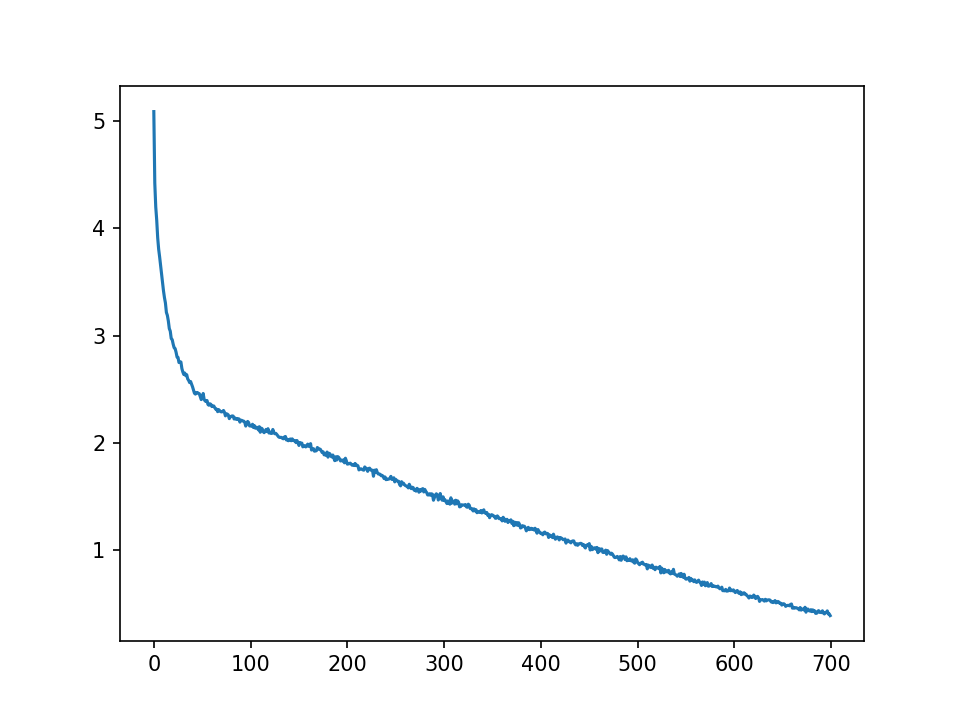

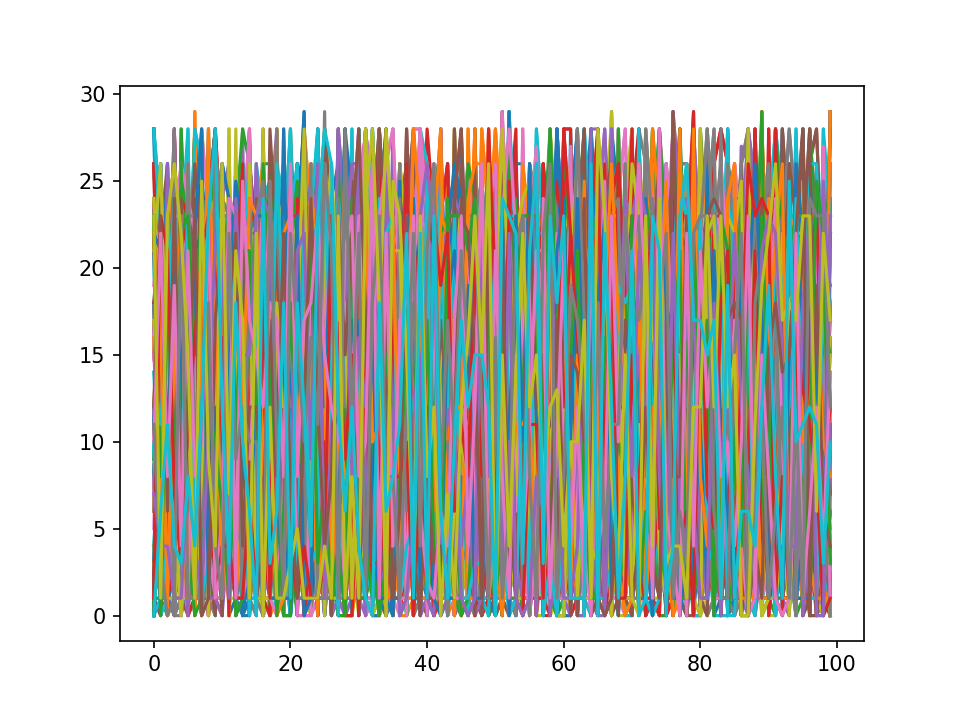

In [9]:
with open("file.txt", 'r', encoding='utf-8') as f:
    text = f.read()

text = text.lower()
chars = sorted(list(set(text)))
stoi = {c:i for i, c in enumerate(chars)}
itos = {i:c for i, c in enumerate(chars)}
data =  [stoi[c] for c in text]
vocab_size = len(chars)

device = "cpu"
ins = 64
outs = vocab_size
nodes = 150
lr = 0.001
n_emb = 120
embed = torch.randn(vocab_size, n_emb)
pos = torch.randn(ins, n_emb)

embed = embed.to(device)
pos = pos.to(device)


data = torch.tensor(data).long()
params = []
def weights(ins, outs):
    ws = torch.randn(ins, outs) *  0.1
    ws = ws.to(device)
    ws = ws.requires_grad_(True)
    params.append(ws)
    return ws


class Head():
    def __init__(self):
        self.wv = weights(n_emb, n_emb//4) # Diveded by number of heads for avoid expandding
        # self.wq = weights(n_emb, n_emb//4) # Diveded by number of heads for avoid expandding
        # self.wk = weights(n_emb, n_emb//4) # Diveded by number of heads for avoid expandding
        self.wr = weights(n_emb, ins)
    def forward(self, x):
        v = x @ self.wv
        # q = x @ self.wq
        # k = x @ self.wk

        # attn = (q @ k.transpose(-2, -1)) / k.shape[0]**0.05
        # tril = torch.tril(att)
        re_weight =  x @ self.wr
        tril = torch.tril(re_weight)
        tril = tril.masked_fill(tril==0, -1e10)
        rew = F.softmax(tril, dim=-1)
        x = rew @ v
        return x


class Block():

    def __init__(self):
        self.heads = [Head(), Head(), Head(), Head()]
        self.w0 = weights(n_emb, nodes)
        self.w1 = weights(nodes, n_emb)
 

    def forward(self, x):
        x = torch.cat([head.forward(x) for head in self.heads], dim=-1)
        x = torch.relu(x @ self.w0)
        x = torch.relu(x @ self.w1)
        return x




class Model():
    def __init__(self):
        self.blocks = [Block(), Block(), Block()]
        self.w2 = weights(n_emb, outs)

    def forward(self, x):
        x = embed[x] + pos 
        x = x + self.blocks[0].forward(x)
        x = x + self.blocks[1].forward(x)
        x = x + self.blocks[2].forward(x)

        yh = x @ self.w2
        return yh



model = Model()
optimizer= torch.optim.Adam(params, lr)

epoch = 700
ers = []
for i in range(epoch):

    b = torch.randint(len(data)-ins, (100,))
    b = b.to(device)
    xs = torch.stack([data[i:i+ins] for i in b])
    ys = torch.stack([data[i+1:i+ins+1] for i in b])
    xs = xs.to(device)
    ys = ys.to(device)


    yh = model.forward(xs)
    loss = F.cross_entropy(yh.view(-1, vocab_size), ys.long().view(-1))
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    # calculate loss function
    e = loss.item()
    # if i % 500 == 0:
    print(e)
    ers.append(e)

plt.figure(1)
plt.plot(ers)

plt.figure(2)
plt.plot(ys)
plt.plot(torch.argmax(yh.detach(), dim=-1))


test_val = xs[0]

# yh =  model.forward(test_val)
# prob =  F.softmax(yh, dim=0)
# prob2 =  torch.softmax(yh * 0.7, dim=0).item()
# pred =  torch.argmax(yh, dim=0).item()
# print(itos[pred])
gen_text = ""
for i in range(3000):

    yh =  model.forward(test_val)
    prob =  F.softmax(yh[-1, :]*0.7, dim=0)
    # pred = torch.argmax(yh).item()
    pred = torch.multinomial(prob, num_samples=1).item()

    test_val = torch.roll(test_val, -1)
    test_val[-1] = pred

    gen_text += itos[pred]


print("--------------[Generated text]--------------")
print(gen_text)
print("--------------[The text]--------------")
print(text)